In [1]:
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
inifile = configparser.ConfigParser()
inifile.read('../config.ini')
df_wine = pd.read_csv(
    inifile.get('url', 'wine'), header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoids phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
feat_labels = df_wine.columns[1:]

In [4]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [5]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
importances = forest.feature_importances_

In [7]:
indices = np.argsort(importances)[::-1]

In [8]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoids phenols          0.014645
13) Ash                            0.013916


In [9]:
plt.title('Feature Importances')

Text(0.5,1,'Feature Importances')

In [10]:
plt.bar(range(X_train.shape[1]), importances[indices], color="lightblue", align='center')

<Container object of 13 artists>

In [11]:
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)

([<matplotlib.axis.XTick at 0x7f47f8061080>,
 <a list of 13 Text xticklabel objects>)

In [12]:
plt.xlim([-1, X_train.shape[1]])

(-1, 13)

In [13]:
plt.tight_layout()

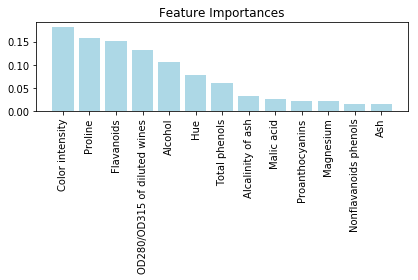

In [14]:
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel

In [16]:
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)

In [17]:
X_selected = sfm.transform(X_train)

In [18]:
X_selected.shape

(124, 3)